In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [29]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [126]:
movies = pd.read_csv("movie_metadata.csv")

In [127]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


# data cleaning and processing

## dropping nas

In [128]:
movies.dropna(inplace = True)

### consequences of dropping nas <-- LYDIA TO DO

What values are we losing when we drop nas? is this causing the dataset to be more imabalanced or less imbalanced? some visualizations like histograms may be helpful here like 

## identifying relevant columns to keep for analysis

In [129]:
string_columns = movies.select_dtypes(exclude=[np.number])
string_columns.columns

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [130]:
movies.columns

## not really sure what num_critic_for_review means so I'll be dropping it 

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [131]:
# Dropping most string columns & other less relevant columns

movies_relevant_columns = movies.drop(['color', 'director_name', 'actor_2_name', 'actor_1_name',
       'movie_title', 'actor_3_name', 'movie_imdb_link',
       'language', 'country', 'content_rating', 'num_critic_for_reviews', 'facenumber_in_poster', 'aspect_ratio'], axis = 1)

In [132]:
movies_relevant_columns.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'num_voted_users',
       'cast_total_facebook_likes', 'plot_keywords', 'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

In [133]:
movies = movies_relevant_columns

In [134]:
movies.head(5)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,avatar|future|marine|native|paraplegic,3054.0,237000000.0,2009.0,936.0,7.9,33000
1,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,300000000.0,2007.0,5000.0,7.1,0
2,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,245000000.0,2015.0,393.0,6.8,85000
3,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,250000000.0,2012.0,23000.0,8.5,164000
5,132.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873,alien|american civil war|male nipple|mars|prin...,738.0,263700000.0,2012.0,632.0,6.6,24000


# model generation

## model with no genre or plot features (numeric columns only)

### data processing

In [141]:
numeric_columns_df = movies.drop(["genres", "plot_keywords"], axis = 1)

In [142]:
numeric_columns_df.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,936.0,7.9,33000
1,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,5000.0,7.1,0
2,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,393.0,6.8,85000
3,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,23000.0,8.5,164000
5,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,632.0,6.6,24000


### splitting into training and testing

In [143]:
def standardize_and_split(df, mean_bool = True):
    # takes in a df and splits + standardizes the data 
    # returns: X_train, X_test, y_train, y_test
    np.random.seed(42)
    y = df.imdb_score
    X = df.drop("imdb_score", axis = 1)
    #print(y)
    #print(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    print("shape of X_train: ", X_train.shape)
    print("shape of Y_train: ", y_train.shape)

    # standardize columns

    scaler = StandardScaler(with_mean = mean_bool)

    # fit scaler on training data
    norm = scaler.fit(X_train)

    print(X_train)
    # transform training data
    X_train_norm = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

    # transform testing dataabs
    X_test_norm = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    
    return(X_train_norm, X_test_norm, y_train, y_test)

In [144]:
X_train, X_test, y_train, y_test = standardize_and_split(numeric_columns_df)

shape of X_train:  (2516, 12)
shape of Y_train:  (2516,)
      duration  director_facebook_likes  actor_3_facebook_likes  \
485      113.0                     25.0                   129.0   
1415     162.0                    333.0                   362.0   
4452      94.0                     87.0                    37.0   
3472     121.0                     82.0                   189.0   
2176     121.0                      0.0                   721.0   
...        ...                      ...                     ...   
1198     129.0                     42.0                    49.0   
1373     123.0                   2000.0                   471.0   
907      118.0                    473.0                   963.0   
4393      95.0                      0.0                     0.0   
3705     115.0                    399.0                    83.0   

      actor_1_facebook_likes       gross  num_voted_users  \
485                  49000.0  55350897.0            83560   
1415            

In [145]:
X_test.head(3)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,0.369888,-0.257487,-0.192669,-0.327247,-0.751495,-0.681455,-0.384580,-0.774537,-0.100650,1.214479,-0.257287,-0.456005
1,1.423111,-0.262228,-0.190599,-0.398834,-0.056515,-0.002141,-0.452943,-0.156780,-0.003157,0.914545,-0.321342,0.957813
2,-0.683336,-0.232088,-0.198881,-0.386588,-0.785555,-0.484759,-0.419142,-0.600870,-0.164996,0.614611,-0.281360,-0.456005


In [146]:
# Basic model classification Neural Net

In [147]:
clf = MLPClassifier(hidden_layer_sizes=(100),random_state=1, max_iter=300).fit(X_train,y_train_round)

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [148]:
y_pred = clf.predict(X_test)

In [149]:
y_test_round = [round(x) for x in y_test]

In [150]:
cnf_matrix = metrics.confusion_matrix(y_test_round, y_pred)

([<matplotlib.axis.YTick at 0x7fae55cfa850>,
 [Text(0, 0.5, '2'),
  Text(0, 1.5, '3'),
  Text(0, 2.5, '4'),
  Text(0, 3.5, '5'),
  Text(0, 4.5, '6'),
  Text(0, 5.5, '7'),
  Text(0, 6.5, '8'),
  Text(0, 7.5, '9')])

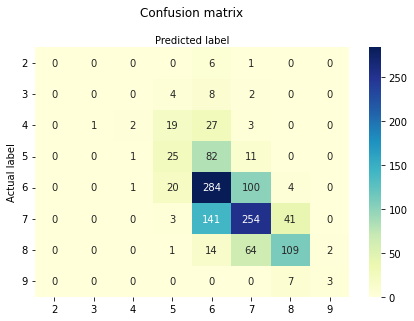

In [151]:
class_names=[2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))+.5
plt.xticks(tick_marks, class_names,rotation = 0)
plt.yticks(tick_marks, class_names,rotation = 0)

In [152]:
score = metrics.accuracy_score(y_test_round, y_pred)
score

0.5459677419354839

### KNN classification

In [153]:
def kkn_pred2(k,x_train,y_train,y_test,x_test):
    '''Takes in a k value,x training set, y training set '''
    knn = KNeighborsClassifier(n_neighbors=k, metric = "euclidean")
    fit = knn.fit(x_train, y_train)
    knn_pred = fit.predict(x_test)
    knn_score = metrics.accuracy_score(y_test, knn_pred)
    return knn_score

In [154]:
def kkn_predictions(k,x_train,y_train,y_test,x_test):
    '''Takes in a k value,x training set, y training set '''
    knn = KNeighborsClassifier(n_neighbors=k, metric = "euclidean")
    fit = knn.fit(x_train, y_train)
    knn_pred = fit.predict(x_test)
    return knn_pred

In [155]:
kkn_predictions(i,X_train,y_train_round,y_test_round,X_test)

array([6, 7, 7, ..., 6, 6, 7])

In [157]:
cnf_matrix = metrics.confusion_matrix(y_test_round, kkn_predictions(40,X_train,y_train_round,y_test_round,X_test))

([<matplotlib.axis.YTick at 0x7fae20595910>,
 [Text(0, 0.5, '2'),
  Text(0, 1.5, '3'),
  Text(0, 2.5, '4'),
  Text(0, 3.5, '5'),
  Text(0, 4.5, '6'),
  Text(0, 5.5, '7'),
  Text(0, 6.5, '8'),
  Text(0, 7.5, '9')])

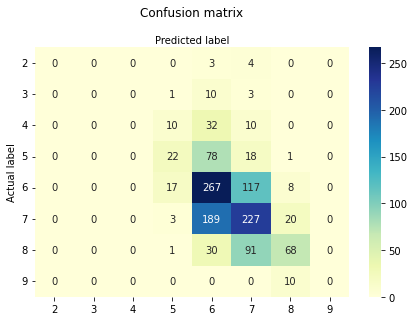

In [158]:
class_names=[2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))+.5
plt.xticks(tick_marks, class_names,rotation = 0)
plt.yticks(tick_marks, class_names,rotation = 0)

In [206]:
k_vals_2 = []
accuracy_scores2 = []
for i in range(1,100,1):
    k_vals_2.append(i)
    accuracy_scores2.append(kkn_pred2(i,X_train,y_train_round,y_test_round,X_test))
    

In [207]:

max(accuracy_scores2)

0.4774193548387097

Text(0.5, 0, 'K-value ')

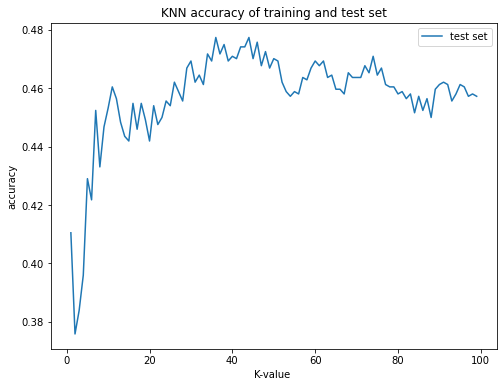

In [138]:
plt.rcParams["figure.dpi"] == 400
plt.figure(figsize=(8, 6))
plt.plot(k_vals_2, accuracy_scores2, label = "test set")
plt.title("KNN accuracy of training and test set")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("K-value ")

### linear regression 

In [170]:
from sklearn.linear_model import LinearRegression

In [173]:
basic_reg = LinearRegression().fit(X_train.values, y_train.values)

In [174]:
basic_reg.coef_

array([ 2.27293802e-01,  3.40135228e-02,  1.39046130e-01,  1.37205862e+00,
       -1.24411764e-01,  5.64832638e-01, -1.63717251e+00, -1.27633221e-01,
        4.63557467e-04, -1.34621049e-01,  3.97190603e-01,  1.10183118e-01])

In [176]:
y_pred = basic_reg.predict(X_test)

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [178]:
y_test.values

array([7. , 6.5, 6.8, ..., 6.3, 7.1, 7.8])

In [179]:
y_pred

array([6.19187659, 6.83424344, 6.09198697, ..., 6.3387336 , 6.03766315,
       6.8763326 ])

In [ ]:
plt.scatter

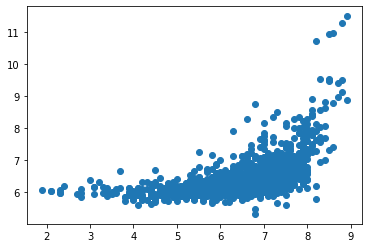

In [180]:
plt.scatter(y_test, y_pred)

Text(0.5, 1.0, 'predicted vs actual IMDB Score')

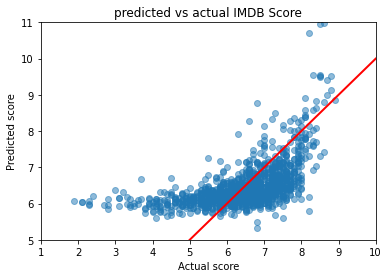

In [189]:

plt.scatter(y_test, y_pred, alpha = .5)
plt.plot([0, 10], [0, 10], color = 'red', linewidth = 2)
plt.xlim(1, 10)
plt.ylim(5, 11)
plt.xlabel("Actual score")
plt.ylabel("Predicted score")
plt.title("predicted vs actual IMDB Score")

## model with genre one hot encoded (no plot col)

### data processing

In [159]:
genre_one_hot_df = movies.drop(["plot_keywords"], axis = 1)

In [160]:
genres = movies.genres

In [161]:
genres_lists = [x.split("|") for x in genres]

In [162]:
#genres_lists

In [163]:
genre_one_hot_df["genres"] = genres_lists

In [164]:
genre_one_hot_df.head(3)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,178.0,0.0,855.0,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",886204,4834,3054.0,237000000.0,2009.0,936.0,7.9,33000
1,169.0,563.0,1000.0,40000.0,309404152.0,"[Action, Adventure, Fantasy]",471220,48350,1238.0,300000000.0,2007.0,5000.0,7.1,0
2,148.0,0.0,161.0,11000.0,200074175.0,"[Action, Adventure, Thriller]",275868,11700,994.0,245000000.0,2015.0,393.0,6.8,85000


In [165]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

In [166]:
genre_one_hot_df = genre_one_hot_df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(genre_one_hot_df.pop('genres')),
                index=movies.index,
                columns=mlb.classes_))

In [167]:
genre_one_hot_df.head(3)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,...,0,0,0,0,0,1,0,0,0,0
1,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,...,0,0,0,0,0,0,0,1,0,0


### splitting into testing & training & standardizing

In [219]:
X_train, X_test, y_train, y_test = standardize_and_split(genre_one_hot_df)

shape of X_train:  (2516, 34)
shape of Y_train:  (2516,)
      duration  director_facebook_likes  actor_3_facebook_likes  \
485      113.0                     25.0                   129.0   
1415     162.0                    333.0                   362.0   
4452      94.0                     87.0                    37.0   
3472     121.0                     82.0                   189.0   
2176     121.0                      0.0                   721.0   
...        ...                      ...                     ...   
1198     129.0                     42.0                    49.0   
1373     123.0                   2000.0                   471.0   
907      118.0                    473.0                   963.0   
4393      95.0                      0.0                     0.0   
3705     115.0                    399.0                    83.0   

      actor_1_facebook_likes       gross  num_voted_users  \
485                  49000.0  55350897.0            83560   
1415            

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [221]:
X_train.head(3)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.140926,-0.253762,-0.332945,2.362273,0.067537,-0.140276,1.817079,0.711553,0.152832,-0.485148,...,-0.344557,-0.204504,-0.158949,-0.339482,1.814804,-0.385822,-0.200248,-0.653539,-0.205557,-0.107984
1,2.384749,-0.149457,-0.212339,0.359439,0.426899,0.249382,0.211835,0.309639,-0.073352,-0.685104,...,-0.344557,-0.204504,-0.158949,-0.339482,1.814804,-0.385822,-0.200248,-0.653539,4.864840,-0.107984
2,-0.729128,-0.232765,-0.380567,-0.436716,-0.785567,-0.674869,-0.533493,-0.667856,-0.173185,0.114720,...,2.902279,-0.204504,-0.158949,-0.339482,-0.551024,-0.385822,-0.200248,-0.653539,-0.205557,-0.107984


# MLP Classifier

In [224]:
y_test_round = [round(x) for x in y_test]
clf = MLPClassifier(hidden_layer_sizes=(100),random_state=1, max_iter=300).fit(X_train,y_train_round)
y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test_round, y_pred)

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7fdba0b2f9d0>,
 [Text(0, 0.5, '2'),
  Text(0, 1.5, '3'),
  Text(0, 2.5, '4'),
  Text(0, 3.5, '5'),
  Text(0, 4.5, '6'),
  Text(0, 5.5, '7'),
  Text(0, 6.5, '8'),
  Text(0, 7.5, '9')])

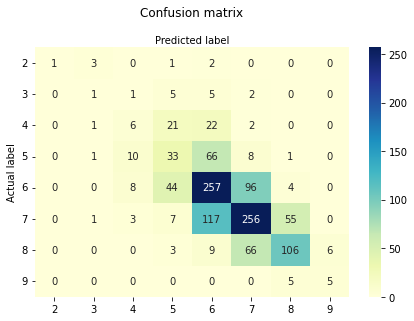

In [225]:
class_names=[2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))+.5
plt.xticks(tick_marks, class_names,rotation = 0)
plt.yticks(tick_marks, class_names,rotation = 0)

In [226]:
score = metrics.accuracy_score(y_test_round, y_pred)
score

0.5362903225806451

## KNN

Text(0.5, 0, 'K-value ')

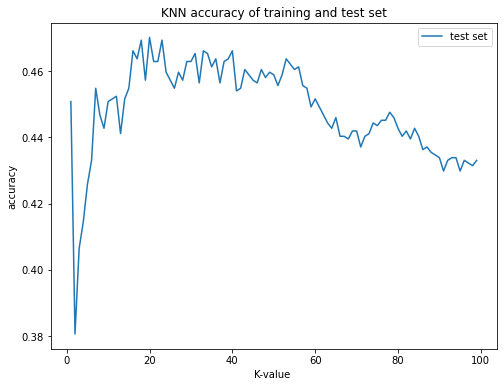

In [227]:
k_vals_2 = []
accuracy_scores2 = []
for i in range(1,100,1):
    k_vals_2.append(i)
    accuracy_scores2.append(kkn_pred2(i,X_train,y_train_round,y_test_round,X_test))
    
plt.rcParams["figure.dpi"] == 400
plt.figure(figsize=(8, 6))
plt.plot(k_vals_2, accuracy_scores2, label = "test set")
plt.title("KNN accuracy of training and test set")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("K-value ")


In [230]:
max(accuracy_scores2)

0.47016129032258064

In [228]:
cnf_matrix = metrics.confusion_matrix(y_test_round, kkn_predictions(20,X_train,y_train_round,y_test_round,X_test))

([<matplotlib.axis.YTick at 0x7fdbf3564280>,
 [Text(0, 0.5, '2'),
  Text(0, 1.5, '3'),
  Text(0, 2.5, '4'),
  Text(0, 3.5, '5'),
  Text(0, 4.5, '6'),
  Text(0, 5.5, '7'),
  Text(0, 6.5, '8'),
  Text(0, 7.5, '9')])

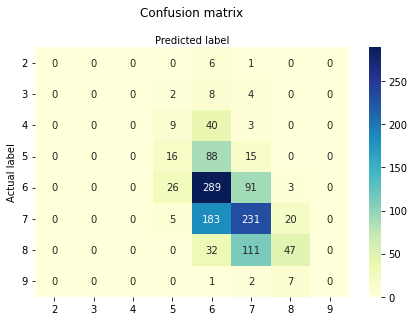

In [229]:
cnf_matrix = metrics.confusion_matrix(y_test_round, kkn_predictions(20,X_train,y_train_round,y_test_round,X_test))
class_names=[2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))+.5
plt.xticks(tick_marks, class_names,rotation = 0)
plt.yticks(tick_marks, class_names,rotation = 0)

## plot, genre, all 

In [168]:
genre_one_hot_df

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,...,0,0,0,0,0,1,0,0,0,0
1,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,...,0,0,0,0,0,0,0,1,0,0
5,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,110.0,107.0,45.0,576.0,136007.0,3924,776,39.0,4500.0,2004.0,...,0,1,0,0,1,0,0,0,0,0
5027,90.0,397.0,0.0,5.0,673780.0,4555,5,26.0,10000.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
5033,77.0,291.0,8.0,291.0,424760.0,72639,368,371.0,7000.0,2004.0,...,0,0,0,0,0,1,0,1,0,0
5035,81.0,0.0,6.0,121.0,2040920.0,52055,147,130.0,7000.0,1992.0,...,0,0,0,0,1,0,0,1,0,0


In [171]:
plot_one_hot_df = movies.drop(["genres"], axis = 1)
plot_one_hot_df = movies.drop(["genres"], axis = 1)
plots_lists = [x.split("|") for x in plots]
plot_one_hot_df["plot_keywords"] = plots_lists
mlb = MultiLabelBinarizer(sparse_output=True)
plot_one_hot_df = plot_one_hot_df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(plot_one_hot_df.pop('plot_keywords')),
                index=plot_one_hot_df.index,
                columns=mlb.classes_))
plot_one_hot_df.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,...,zeus,zodiac,zodiac killer,zoloft,zombie,zombie apocalypse,zombie spoof,zoo,zoologist,zorro
0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,...,0,0,0,0,0,0,0,0,0,0
1,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,...,0,0,0,0,0,0,0,0,0,0
3,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
5,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
plot_merge = plot_one_hot_df.iloc[:,13:]

In [186]:
all_one_hot_df = pd.merge(plot_one_hot_df, plot_merge, left_index=True, right_index=True)

In [187]:
all_one_hot_df

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,...,zeus_y,zodiac_y,zodiac killer_y,zoloft_y,zombie_y,zombie apocalypse_y,zombie spoof_y,zoo_y,zoologist_y,zorro_y
0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,...,0,0,0,0,0,0,0,0,0,0
1,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,...,0,0,0,0,0,0,0,0,0,0
3,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
5,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,110.0,107.0,45.0,576.0,136007.0,3924,776,39.0,4500.0,2004.0,...,0,0,0,0,0,0,0,0,0,0
5027,90.0,397.0,0.0,5.0,673780.0,4555,5,26.0,10000.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
5033,77.0,291.0,8.0,291.0,424760.0,72639,368,371.0,7000.0,2004.0,...,0,0,0,0,0,0,0,0,0,0
5035,81.0,0.0,6.0,121.0,2040920.0,52055,147,130.0,7000.0,1992.0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
X_train, X_test, y_train, y_test = standardize_and_split(all_one_hot_df)

shape of X_train:  (2516, 13464)
shape of Y_train:  (2516,)


/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


      duration  director_facebook_likes  actor_3_facebook_likes  \
485      113.0                     25.0                   129.0   
1415     162.0                    333.0                   362.0   
4452      94.0                     87.0                    37.0   
3472     121.0                     82.0                   189.0   
2176     121.0                      0.0                   721.0   
...        ...                      ...                     ...   
1198     129.0                     42.0                    49.0   
1373     123.0                   2000.0                   471.0   
907      118.0                    473.0                   963.0   
4393      95.0                      0.0                     0.0   
3705     115.0                    399.0                    83.0   

      actor_1_facebook_likes       gross  num_voted_users  \
485                  49000.0  55350897.0            83560   
1415                 14000.0  78651430.0           142067   
4452        

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [201]:
y_test_round = [round(x) for x in y_test]
y_train_round = [round(x) for x in y_train]

clf = MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=1, max_iter=300).fit(X_train,y_train_round)
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test_round, y_pred)

0.35161290322580646


([<matplotlib.axis.YTick at 0x7fae494d4ac0>,
 [Text(0, 0.5, '2'),
  Text(0, 1.5, '3'),
  Text(0, 2.5, '4'),
  Text(0, 3.5, '5'),
  Text(0, 4.5, '6'),
  Text(0, 5.5, '7'),
  Text(0, 6.5, '8'),
  Text(0, 7.5, '9')])

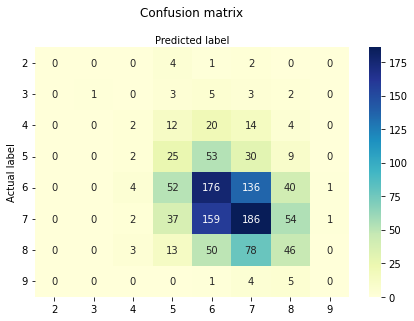

In [202]:

score = metrics.accuracy_score(y_test_round, y_pred)
print(score)

class_names=[2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)



# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))+.5
plt.xticks(tick_marks, class_names,rotation = 0)
plt.yticks(tick_marks, class_names,rotation = 0)

0.37016129032258066


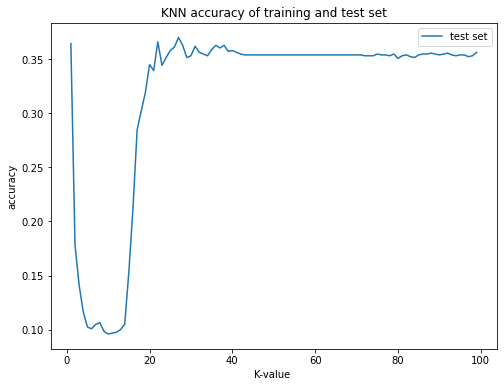

In [203]:
k_vals_2 = []
accuracy_scores2 = []
for i in range(1,100,1):
    k_vals_2.append(i)
    accuracy_scores2.append(kkn_pred2(i,X_train,y_train_round,y_test_round,X_test))

plt.rcParams["figure.dpi"] == 400
plt.figure(figsize=(8, 6))
plt.plot(k_vals_2, accuracy_scores2, label = "test set")
plt.title("KNN accuracy of training and test set")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("K-value ")

print(max(accuracy_scores2))

# plot

### data processing

In [16]:
plot_one_hot_df = movies.drop(["genres"], axis = 1)

In [17]:
plots = movies.plot_keywords

In [18]:
plots_lists = [x.split("|") for x in plots]

In [19]:
plot_one_hot_df["plot_keywords"] = plots_lists

In [20]:
mlb = MultiLabelBinarizer(sparse_output=True)

In [21]:
plot_one_hot_df = plot_one_hot_df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(plot_one_hot_df.pop('plot_keywords')),
                index=plot_one_hot_df.index,
                columns=mlb.classes_))

In [22]:
plot_one_hot_df.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,...,zeus,zodiac,zodiac killer,zoloft,zombie,zombie apocalypse,zombie spoof,zoo,zoologist,zorro
0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,...,0,0,0,0,0,0,0,0,0,0
1,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,...,0,0,0,0,0,0,0,0,0,0
3,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
5,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,...,0,0,0,0,0,0,0,0,0,0


### splitting into testing & training & standardizing

In [25]:
X_train, X_test, y_train, y_test = standardize_and_split(plot_one_hot_df)

shape of X_train:  (2516, 6738)
shape of Y_train:  (2516,)


/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


      duration  director_facebook_likes  actor_3_facebook_likes  \
485      113.0                     25.0                   129.0   
1415     162.0                    333.0                   362.0   
4452      94.0                     87.0                    37.0   
3472     121.0                     82.0                   189.0   
2176     121.0                      0.0                   721.0   
...        ...                      ...                     ...   
1198     129.0                     42.0                    49.0   
1373     123.0                   2000.0                   471.0   
907      118.0                    473.0                   963.0   
4393      95.0                      0.0                     0.0   
3705     115.0                    399.0                    83.0   

      actor_1_facebook_likes       gross  num_voted_users  \
485                  49000.0  55350897.0            83560   
1415                 14000.0  78651430.0           142067   
4452        

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [38]:

y_test_round = [round(x) for x in y_test]
y_train_round = [round(x) for x in y_train]

clf = MLPClassifier(hidden_layer_sizes=(100,100),random_state=1, max_iter=300).fit(X_train,y_train_round)
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test_round, y_pred)


0.36129032258064514


([<matplotlib.axis.YTick at 0x7fae74609340>,
 [Text(0, 0.5, '2'),
  Text(0, 1.5, '3'),
  Text(0, 2.5, '4'),
  Text(0, 3.5, '5'),
  Text(0, 4.5, '6'),
  Text(0, 5.5, '7'),
  Text(0, 6.5, '8'),
  Text(0, 7.5, '9')])

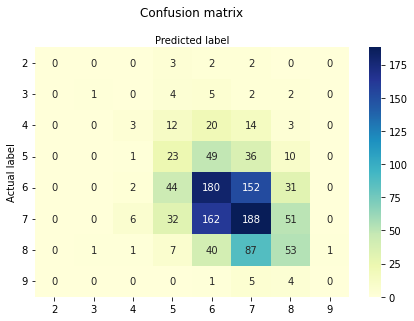

In [39]:

score = metrics.accuracy_score(y_test_round, y_pred)
print(score)

class_names=[2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)



# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))+.5
plt.xticks(tick_marks, class_names,rotation = 0)
plt.yticks(tick_marks, class_names,rotation = 0)

In [55]:
k_vals_2 = []
accuracy_scores2 = []
for i in range(1,100,1):
    k_vals_2.append(i)
    accuracy_scores2.append(kkn_pred2(i,X_train,y_train_round,y_test_round,X_test))

plt.rcParams["figure.dpi"] == 400
plt.figure(figsize=(8, 6))
plt.plot(k_vals_2, accuracy_scores2, label = "test set")
plt.title("KNN accuracy of training and test set")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("K-value ")

print(max(accuracy_scores2))

KeyboardInterrupt: 

In [42]:
print(max(accuracy_scores2))

0.36612903225806454


([<matplotlib.axis.YTick at 0x7fae624ec5b0>,
 [Text(0, 0.5, '2'),
  Text(0, 1.5, '3'),
  Text(0, 2.5, '4'),
  Text(0, 3.5, '5'),
  Text(0, 4.5, '6'),
  Text(0, 5.5, '7'),
  Text(0, 6.5, '8'),
  Text(0, 7.5, '9')])

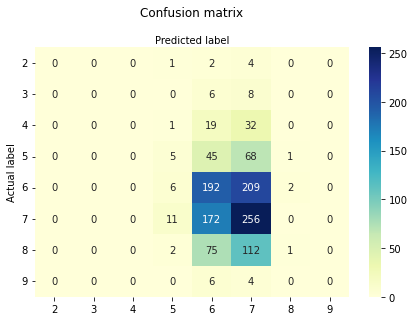

In [41]:
cnf_matrix = metrics.confusion_matrix(y_test_round, kkn_predictions(22,X_train,y_train_round,y_test_round,X_test))
class_names=[2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))+.5
plt.xticks(tick_marks, class_names,rotation = 0)
plt.yticks(tick_marks, class_names,rotation = 0)

## model and accuracy

In [166]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
regr = MLPRegressor(random_state=7, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [176]:
def model_and_accuracy(X_train, X_test, y_train, y_test):
    regr = MLPRegressor(random_state=7, max_iter=500).fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    return(accuracy, conf_matrix)
    

In [181]:
movies.imdb_score.min()

1.6

In [ ]:
def confusion_matrix_graphic(cf_matrix, title):
    # cf_matrix: arr with the confusion matrix
    # title: str w/ title of the plot (title should be descriptive based on the df)
    plt.figure(figsize=(8,6))
    plt.title(title)
    # group_names needs to be edited to reflect the order of the ratings according to the cnf matrix
    group_names = ["True Adelie","Ad pred. Chin", "Ad pred. Gent", "Chin pred. Ad", "True Chinstrap", "Chin pred. Gent", "Gent pred. Ad", "Gent pred. Chin", "True Gentoo"]
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    # reshape needs to be edited to reflect the size of the confusion matrix (this will depend on the predicted values)
    labels = np.asarray(labels).reshape(3,3)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [177]:
accuracy, conf_matrix = model_and_accuracy(X_train, X_test, y_train, y_test)

ValueError: continuous is not supported

### confusion matrix graphic

In [ ]:
confusion_matrix_graphic(conf_matrix)

## model w/ only genre tags

### data processing

In [70]:
movies.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'num_voted_users',
       'cast_total_facebook_likes', 'plot_keywords', 'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

In [83]:
genres_df = genre_one_hot_df.drop(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes',
       'movie_facebook_likes'], axis = 1)

In [84]:
genres_df

,genres,imdb_score
0,"[Action, Adventure, Fantasy, Sci-Fi]",7.9
1,"[Action, Adventure, Fantasy]",7.1
2,"[Action, Adventure, Thriller]",6.8
3,"[Action, Thriller]",8.5
5,"[Action, Adventure, Sci-Fi]",6.6
...,...,...
5026,"[Drama, Music, Romance]",6.9
5027,[Drama],7.5
5033,"[Drama, Sci-Fi, Thriller]",7.0
5035,"[Action, Crime, Drama, Romance, Thriller]",6.9


Index(['genres', 'imdb_score'], dtype='object')

In [88]:
genres_df_encoded = genres_df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(genres_df.pop('genres')),
                index=genre_df.index,
                columns=mlb.classes_))

In [89]:
genres_df_encoded

,imdb_score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,7.9,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.8,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6.6,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,6.9,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
5027,7.5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5033,7.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
5035,6.9,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0


### splitting into testing & training & standardizing

In [91]:
X_train, X_test, y_train, y_test = standardize_and_split(genres_df_encoded, False)

shape of X_train:  (2516, 22)
shape of Y_train:  (2516,)
      Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
485        0          0          0          0       0      0            0   
1415       0          0          0          0       0      0            0   
4452       0          1          0          0       1      0            0   
3472       1          1          0          0       0      0            0   
2176       0          0          0          0       1      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
1198       0          0          0          0       1      0            0   
1373       1          0          0          1       0      0            0   
907        0          0          0          0       0      1            0   
4393       0          0          0          0       1      0            0   
3705       0          0          0          0       1      0            0   

      Drama  Famil

ValueError: Shape of passed values is (2516, 1), indices imply (2516, 22)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,0.369888,-0.257487,-0.192669,-0.327247,-0.751495,-0.681455,-0.384580,-0.774537,-0.100650,1.214479,-0.257287,-0.456005
1,1.423111,-0.262228,-0.190599,-0.398834,-0.056515,-0.002141,-0.452943,-0.156780,-0.003157,0.914545,-0.321342,0.957813
2,-0.683336,-0.232088,-0.198881,-0.386588,-0.785555,-0.484759,-0.419142,-0.600870,-0.164996,0.614611,-0.281360,-0.456005
3,0.324095,-0.262228,0.023698,0.416663,0.818689,0.637607,0.255443,1.679124,0.133333,-0.085236,-0.208932,-0.456005
4,-0.271205,-0.249359,-0.042558,-0.395858,-0.732967,-0.500203,-0.418713,-0.628161,-0.172795,1.014523,-0.266079,-0.456005
...,...,...,...,...,...,...,...,...,...,...,...,...
1235,-0.866505,-0.255116,-0.156953,-0.407532,-0.782382,-0.693104,-0.424045,-0.764613,-0.176695,-0.085236,-0.316737,-0.451662
1236,-0.958089,-0.255793,-0.219068,-0.411595,-0.071081,-0.523893,-0.479840,0.140934,-0.100650,0.214699,-0.336204,-0.405511
1237,-1.049674,-0.175872,0.019557,1.046125,-0.121475,0.343954,0.837290,0.019367,-0.053854,0.214699,-0.208932,-0.456005
1238,-0.866505,-0.257487,-0.116061,0.359439,-0.766207,-0.598312,0.252586,-0.466899,-0.157197,-0.185214,-0.208932,-0.456005


## model with only plot tags

In [42]:
plot_df = plot_one_hot_df.drop(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes',
       'movie_facebook_likes'], axis = 1)

In [43]:
plot_df

,imdb_score,10 year old,1000000 b.c.,1190s,12 step program,12 year old,12 year time span,12th century,13 year old,13 year olds,...,zeus,zodiac,zodiac killer,zoloft,zombie,zombie apocalypse,zombie spoof,zoo,zoologist,zorro
0,7.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,6.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5027,7.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5033,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5035,6.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### splitting into testing & training & standardizing

In [161]:
X_train, X_test, y_train, y_test = standardize_and_split(plot_df, False)

shape of X_train:  (2516, 6726)
shape of Y_train:  (2516,)
      10 year old  1000000 b.c.  1190s  12 step program  12 year old  \
485             0             0      0                0            0   
1415            0             0      0                0            0   
4452            0             0      0                0            0   
3472            0             0      0                0            0   
2176            0             0      0                0            0   
...           ...           ...    ...              ...          ...   
1198            0             0      0                0            0   
1373            0             0      0                0            0   
907             0             0      0                0            0   
4393            0             0      0                0            0   
3705            0             0      0                0            0   

      12 year time span  12th century  13 year old  13 year olds  \
485     

ValueError: Shape of passed values is (2516, 1), indices imply (2516, 6726)

#

## model with all plot and genre features

In [98]:
movies_dupe = movies

In [99]:
movies_dupe["plot_keywords"] = plots_lists

In [100]:
mlb = MultiLabelBinarizer(sparse_output=True)

In [101]:
movies_dupe = movies_dupe.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(movies_dupe.pop('plot_keywords')),
                index=movies_dupe.index,
                columns=mlb.classes_))

In [102]:
movies_dupe

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,...,zeus,zodiac,zodiac killer,zoloft,zombie,zombie apocalypse,zombie spoof,zoo,zoologist,zorro
0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,3054.0,237000000.0,...,0,0,0,0,0,0,0,0,0,0
1,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,1238.0,300000000.0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,994.0,245000000.0,...,0,0,0,0,0,0,0,0,0,0
3,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,2701.0,250000000.0,...,0,0,0,0,0,0,0,0,0,0
5,132.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873,738.0,263700000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,110.0,107.0,45.0,576.0,136007.0,Drama|Music|Romance,3924,776,39.0,4500.0,...,0,0,0,0,0,0,0,0,0,0
5027,90.0,397.0,0.0,5.0,673780.0,Drama,4555,5,26.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
5033,77.0,291.0,8.0,291.0,424760.0,Drama|Sci-Fi|Thriller,72639,368,371.0,7000.0,...,0,0,0,0,0,0,0,0,0,0
5035,81.0,0.0,6.0,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,52055,147,130.0,7000.0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
movies_dupe["plot_keywords"] = genres_lists

In [104]:
movies_dupe["genres"] = genres_lists

In [105]:
mlb = MultiLabelBinarizer(sparse_output=True)

In [106]:
movies_dupe = movies_dupe.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(movies_dupe.pop('genres')),
                index=movies_dupe.index,
                columns=mlb.classes_))

In [107]:
movies_dupe

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,...,0,0,0,0,0,1,0,0,0,0
1,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,...,0,0,0,0,0,0,0,1,0,0
5,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,110.0,107.0,45.0,576.0,136007.0,3924,776,39.0,4500.0,2004.0,...,0,1,0,0,1,0,0,0,0,0
5027,90.0,397.0,0.0,5.0,673780.0,4555,5,26.0,10000.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
5033,77.0,291.0,8.0,291.0,424760.0,72639,368,371.0,7000.0,2004.0,...,0,0,0,0,0,1,0,1,0,0
5035,81.0,0.0,6.0,121.0,2040920.0,52055,147,130.0,7000.0,1992.0,...,0,0,0,0,1,0,0,1,0,0


In [110]:
all_features_df = movies_dupe

In [111]:
all_features_df

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,...,0,0,0,0,0,1,0,0,0,0
1,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,...,0,0,0,0,0,0,0,1,0,0
5,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,110.0,107.0,45.0,576.0,136007.0,3924,776,39.0,4500.0,2004.0,...,0,1,0,0,1,0,0,0,0,0
5027,90.0,397.0,0.0,5.0,673780.0,4555,5,26.0,10000.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
5033,77.0,291.0,8.0,291.0,424760.0,72639,368,371.0,7000.0,2004.0,...,0,0,0,0,0,1,0,1,0,0
5035,81.0,0.0,6.0,121.0,2040920.0,52055,147,130.0,7000.0,1992.0,...,0,0,0,0,1,0,0,1,0,0


In [116]:
y = all_features_df.imdb_score
X = all_features_df.drop("imdb_score", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [123]:
scaled_features = StandardScaler().fit_transform(X_train.values)

ValueError: setting an array element with a sequence.

In [122]:
scaler = StandardScaler()

# fit scaler on training data
norm = scaler.fit(X_train.values)

ValueError: setting an array element with a sequence.

shape of X_train:  (2516, 6761)
shape of Y_train:  (2516,)


/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


ValueError: setting an array element with a sequence.

# previous code

### dropping nas

In [204]:
movies_no_na = movies_clean_genres.dropna()

In [205]:
#movies_no_na

In [206]:
string_columns = movies_no_na.select_dtypes(exclude=[np.number])
string_columns

,movie_color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,movie_imdb_link,movie_language,country,content_rating
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
5,Color,Andrew Stanton,Samantha Morton,Daryl Sabara,John Carter,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13
...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,Béatrice Dalle,Maggie Cheung,Clean,Don McKellar,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,French,France,R
5027,Color,Jafar Panahi,Nargess Mamizadeh,Fereshteh Sadre Orafaiy,The Circle,Mojgan Faramarzi,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,Persian,Iran,Not Rated
5033,Color,Shane Carruth,David Sullivan,Shane Carruth,Primer,Casey Gooden,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,English,USA,PG-13
5035,Color,Robert Rodriguez,Peter Marquardt,Carlos Gallardo,El Mariachi,Consuelo Gómez,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Spanish,USA,R


### finding relevant columns to keep for analysis 

In [207]:
# Dropping string columns
movies_relevant_columns = movies_no_na.columns.drop(["facenumber_in_poster", "aspect_ratio", "movie_imdb_link","movie_color","actor_1_name","actor_2_name","director_name",
                                                    "movie_title","actor_3_name","movie_imdb_link","movie_language","country","content_rating"])
len(movies_relevant_columns)

8101

In [208]:
movies_clean = movies_no_na[movies_relevant_columns]

In [209]:
# Normalization
# x should not contain y
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import numpy as np
X = movies_clean
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)

/Users/lydialo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/lydialo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### splitting the data into training and testing

In [215]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [211]:
X = X.drop("imdb_score", axis = 1)
y = movies_clean.imdb_score

In [216]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

## Exploratory data analysis

In [ ]:
# Check for correlation between predictors using a confusion matrix 
# Helpful- https://jazpeng.github.io/predict_movie_ratings/

## One hot encoding

## Model generation

In [ ]:
# Logistic Regression
# Decision tree
# Lasso 
# Ridge 
# KNN classifier
# Random forest
# Compare to baseline accuracy score?
# Use GridSerach CV tool?

# action items

## Andrew

• debug the code for the function standardize_and_split. it works for some dfs but not others (specifically it's not working for the ones that are only one hot encoded as well as the largest df)
<br>
• debug the function model_and_accuracy --> right now it says continuous is not supported
<br>
• fix the code for the function confusion_matrix_graphic to be reflective of the dimensions of the confusion matrix
<br>
• apply the functions to each of the models

# questions

should we do more EDA to figure out how to clean this properly and / or to indicate what parts of the data we're losing when we drop NAs? (for example, if the NAs are mostly associated with older films or a particular genre of film)